# Traffic Accident Analysis

Unsupervised Learning

Christy Liner

December 2019

# Acknowledgements

- This dataset was acquired through Kaggle: https://www.kaggle.com/sobhanmoosavi/us-accidents


- **“A Countrywide Traffic Accident Dataset” (2019).**

 *Moosavi, Sobhan, Mohammad Hossein Samavatian, Srinivasan Parthasarathy, and Rajiv Ramnath:*


- **“Accident Risk Prediction based on Heterogeneous Sparse Data: New Dataset and Insights.”**

    *Moosavi, Sobhan, Mohammad Hossein Samavatian, Srinivasan Parthasarathy, Radu Teodorescu, and Rajiv Ramnath:*


# Column Descriptions

**ID** This is a unique identifier of the accident record.

**Source** Indicates source of the accident report (i.e. the API which reported the accident.).

**TMC** A traffic accident may have a Traffic Message Channel (TMC) code which provides more detailed description of the event.

**Severity** Shows the severity of the accident, a number between 1 and 4, where 1 indicates the least impact on traffic (i.e., short delay as a result of the accident) and 4 indicates a significant impact on traffic (i.e., long delay).

**Start_Time** Shows start time of the accident in local time zone.

**End_Time** Shows end time of the accident in local time zone.

**Start_Lat** Shows latitude in GPS coordinate of the start point.

**Start_Lng** Shows longitude in GPS coordinate of the start point.

**End_Lat** Shows latitude in GPS coordinate of the end point.

**End_Lng** Shows longitude in GPS coordinate of the end point.

**Distance(mi)** The length of the road extent affected by the accident.

**Description** Shows natural language description of the accident.

**Number** Shows the street number in address field.

**Street** Shows the street name in address field.

**Side** Shows the relative side of the street (Right/Left) in address field.

**City** Shows the city in address field.

**County** Shows the county in address field.

**State** Shows the state in address field.

**Zipcode** Shows the zipcode in address field.

**Country** Shows the country in address field.

**Timezone** Shows timezone based on the location of the accident (eastern, central, etc.).

**Airport_Code** Denotes an airport-based weather station which is the closest one to location of the accident.

**Weather_Timestamp** Shows the time-stamp of weather observation record (in local time).

**Temperature(F)** Shows the temperature (in Fahrenheit).

**Wind_Chill(F)** Shows the wind chill (in Fahrenheit).

**Humidity(%)** Shows the humidity (in percentage).

**Pressure(in)** Shows the air pressure (in inches).

**Visibility(mi)** Shows visibility (in miles).

**Wind_Direction** Shows wind direction.

**Wind_Speed(mph)** Shows wind speed (in miles per hour).

**Precipitation(in)** Shows precipitation amount in inches, if there is any.

**Weather_Condition** Shows the weather condition (rain, snow, thunderstorm, fog, etc.)

**Amenity** A POI annotation which indicates presence of amenity in a nearby location.

**Bump** A POI annotation which indicates presence of speed bump or hump in a nearby location.

**Crossing** A POI annotation which indicates presence of crossing in a nearby location.

**Give_Way** A POI annotation which indicates presence of give_way in a nearby location.

**Junction** A POI annotation which indicates presence of junction in a nearby location.

**No_Exit** A POI annotation which indicates presence of no_exit in a nearby location.

**Railway** A POI annotation which indicates presence of railway in a nearby location.

**Roundabout** A POI annotation which indicates presence of roundabout in a nearby location.

**Station** A POI annotation which indicates presence of station in a nearby location.

**Stop** A POI annotation which indicates presence of stop in a nearby location.

**Traffic_Calming** A POI annotation which indicates presence of traffic_calming in a nearby location.

**Traffic_Signal** A POI annotation which indicates presence of traffic_signal in a nearby location.

**Turning_Loop** A POI annotation which indicates presence of turning_loop in a nearby location.

**Sunrise_Sunset** Shows the period of day (i.e. day or night) based on sunrise/sunset.

**Civil_Twilight** Shows the period of day (i.e. day or night) based on civil twilight.

**Nautical_Twilight** Shows the period of day (i.e. day or night) based on nautical twilight.

**Astronomical_Twilight** Shows the period of day (i.e. day or night) based on astronomical twilight.

# Imports

In [286]:
!pip install plotly prince pyclustering umap-learn hdbscan --upgrade

Requirement already up-to-date: plotly in /Applications/anaconda3/lib/python3.7/site-packages (4.4.1)
Requirement already up-to-date: prince in /Applications/anaconda3/lib/python3.7/site-packages (0.6.3)
Requirement already up-to-date: pyclustering in /Applications/anaconda3/lib/python3.7/site-packages (0.9.2)
Requirement already up-to-date: umap-learn in /Applications/anaconda3/lib/python3.7/site-packages (0.3.10)
Requirement already up-to-date: hdbscan in /Applications/anaconda3/lib/python3.7/site-packages (0.8.24)


In [122]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [38]:
import pandas as pd
import numpy as np

In [39]:
from sklearn.decomposition import PCA, FastICA, FactorAnalysis
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AffinityPropagation
import umap
import prince
from pyclustering.cluster.kmedoids import kmedoids
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import dendrogram, linkage
import hdbscan

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(palette = 'muted')
import plotly.express as px
import plotly.graph_objects as go

In [41]:
import warnings
warnings.filterwarnings('ignore')

import timeit
import time
from datetime import datetime
import random
from collections import Counter 

# Data Frame Creation (Missouri 2018)

In [42]:
df = pd.read_csv('/Users/ChristyLiner/Downloads/US_Accidents_May19.csv')

In [43]:
df = df.loc[df['State']=='MO']

# Data Cleaning

- Dropping irrelevant features
- Dropping highly correlated features
- Dropping nulls
- Extracting date / time features

In [44]:
#drop unnecessary columns or columns with many null values
df.drop(columns = ['Bump', 'Roundabout', 'Traffic_Calming', 'Turning_Loop', 'End_Lat', 'End_Lng', 'Number', 'Street', 'City', 'Zipcode', 'Timezone', 'Airport_Code', 'Weather_Timestamp', 
                   'Wind_Chill(F)', 'Wind_Speed(mph)', 'TMC', 'ID', 'Source', 'End_Time', 'Country', 
                   'Description', 'Precipitation(in)'], inplace = True)
# df.drop(columns = ['End_Time', 'ID', 'Turning_Loop', 'Bump', 'Description', 'Timezone', 'Source', 'Street', 'County', 
#                    'Zipcode', 'Country', 'Airport_Code', 'TMC', 'End_Lat', 'End_Lng', 'Weather_Timestamp', 'Number', 
#                    'Wind_Chill(F)', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight', 
#                    'Distance(mi)', 'No_Exit', 'Give_Way', 'Roundabout', 'Traffic_Calming', 'Precipitation(in)], inplace = True)

#drop remaining nulls
df.dropna(axis = 0, inplace = True)

In [45]:
df['Day_of_Month'] = pd.to_datetime(df['Start_Time']).dt.day
df['Day_of_Week'] = pd.to_datetime(df['Start_Time']).dt.weekday
df['Week_of_Year'] = pd.to_datetime(df['Start_Time']).dt.weekofyear
df['Year'] = pd.to_datetime(df['Start_Time']).dt.year
df['Hour'] = pd.to_datetime(df['Start_Time']).dt.hour

#drop this column now because information has been extracted
df.drop(columns = ['Start_Time'], inplace = True)

In [46]:
df = df.loc[df['Year']==2018]
df.drop(columns = ['State', 'Year'], inplace = True)

# Expoloratory Data Analysis

- View geographically
- Check for outliers
- Visualize accidents by weather conditions
- Visualize accidents by road conditions
- Visualize accidents by time of day
- Correlation heatmap

**Note:** 

Virtually no accidents occur around speed bumps, roundabouts, traffic calmings, and turning loops. 

In [47]:
#update severity to be a string for graphing purposes 
df['Severity'] = df['Severity'].astype(str)

px.set_mapbox_access_token("pk.eyJ1IjoiY2hyaXN0eWFsaW5lciIsImEiOiJjazQ2OTZpemEwaHY2M2VydGdzcnF6ZnN0In0.9QKi2cPrG5TrqTcY0oTINA")
fig = px.scatter_mapbox(data_frame = df,
                        lat = 'Start_Lat',
                        lon = 'Start_Lng',
                        color = 'Severity',
                        title = 'Missouri Accidents by Severity',
                        color_continuous_scale = px.colors.qualitative.G10,
                        center = {'lat': 38.5 , 'lon': -92 },
                        size_max = 1,
                        zoom = 5.2, 
                        category_orders = {'Severity': ['1', '2', '3', '4']})
fig.show()

#change it back to an integer for other visualizations
df['Severity'] = df['Severity'].astype(int)

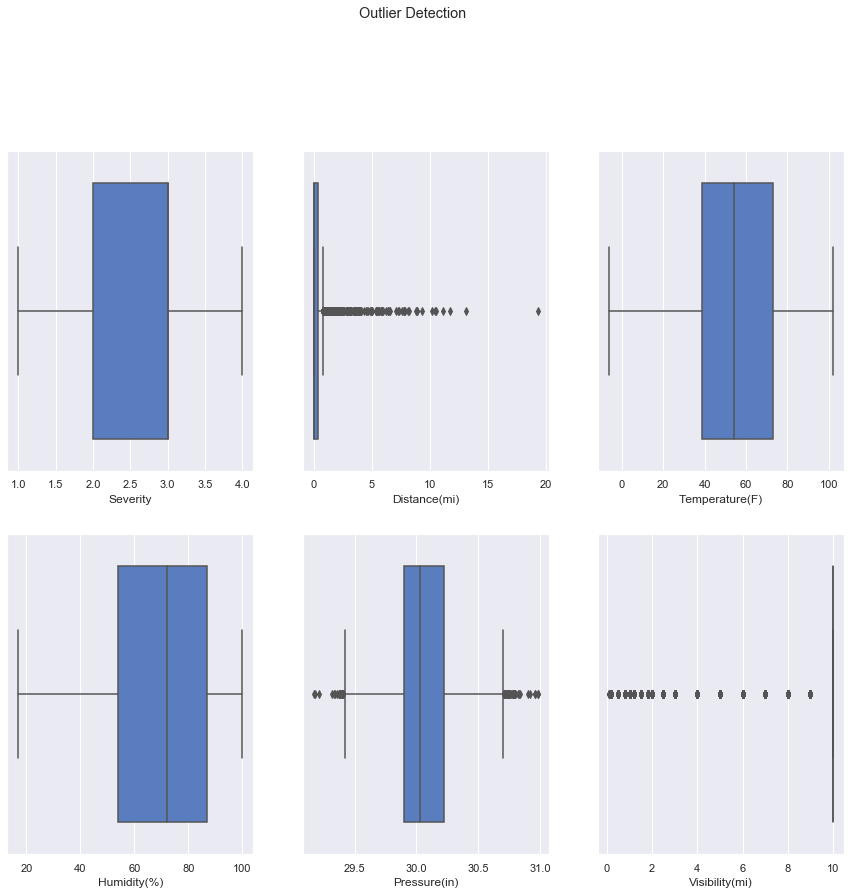

In [48]:
columns = ['Severity', 'Distance(mi)', 'Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)']

plt.figure(figsize = (15, 20))
for i, j in enumerate(columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(df[j])

plt.suptitle('Outlier Detection')
plt.show()

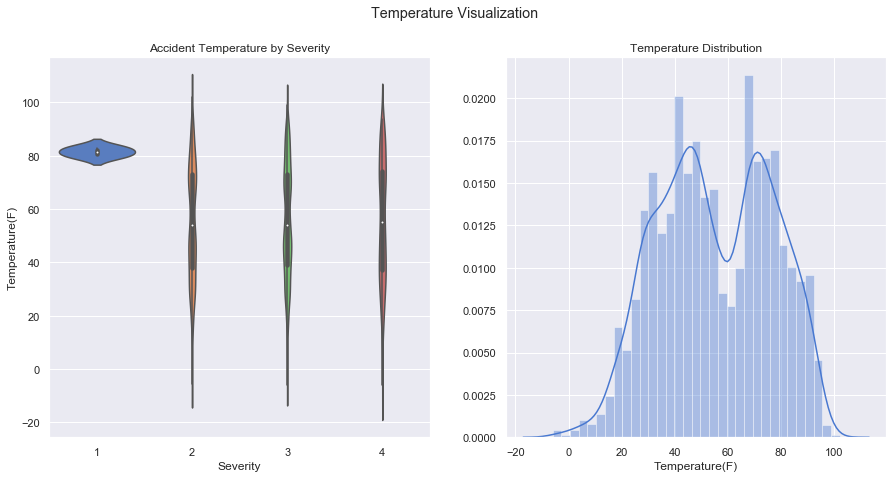

In [49]:
plt.figure(figsize = (15,7))
plt.subplot(1,2,1)
sns.violinplot(x = 'Severity', y = 'Temperature(F)', data = df)
plt.title('Accident Temperature by Severity')

plt.subplot(1,2,2)
sns.distplot(df['Temperature(F)'])
plt.title('Temperature Distribution')

plt.suptitle('Temperature Visualization')

plt.show()

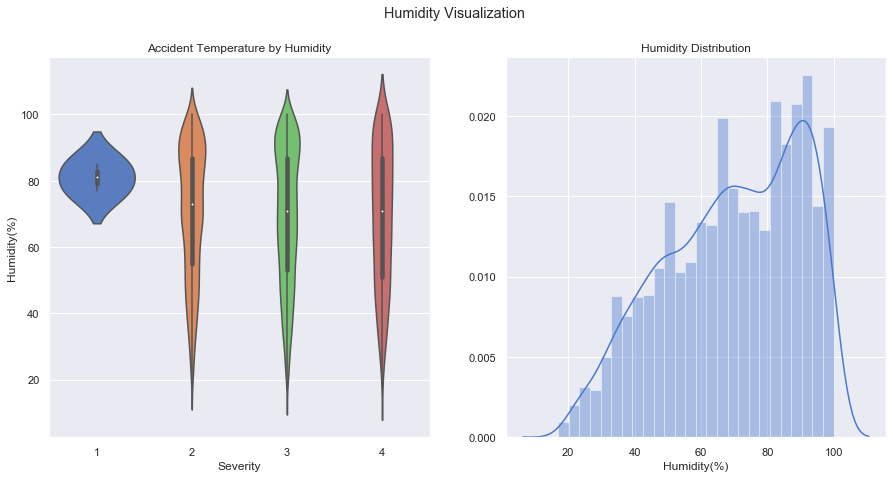

In [50]:
plt.figure(figsize = (15,7))
plt.subplot(1,2,1)
sns.violinplot(x = 'Severity', y = 'Humidity(%)', data = df)
plt.title('Accident Temperature by Humidity')

plt.subplot(1,2,2)
sns.distplot(df['Humidity(%)'])
plt.title('Humidity Distribution')

plt.suptitle('Humidity Visualization')

plt.show()

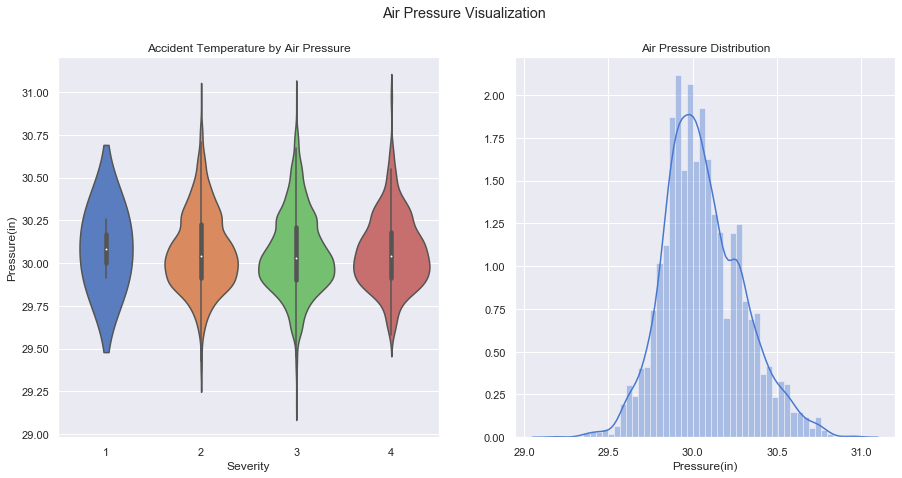

In [51]:
plt.figure(figsize = (15,7))
plt.subplot(1,2,1)
sns.violinplot(x = 'Severity', y = 'Pressure(in)', data = df)
plt.title('Accident Temperature by Air Pressure')

plt.subplot(1,2,2)
sns.distplot(df['Pressure(in)'])
plt.title('Air Pressure Distribution')

plt.suptitle('Air Pressure Visualization')

plt.show()

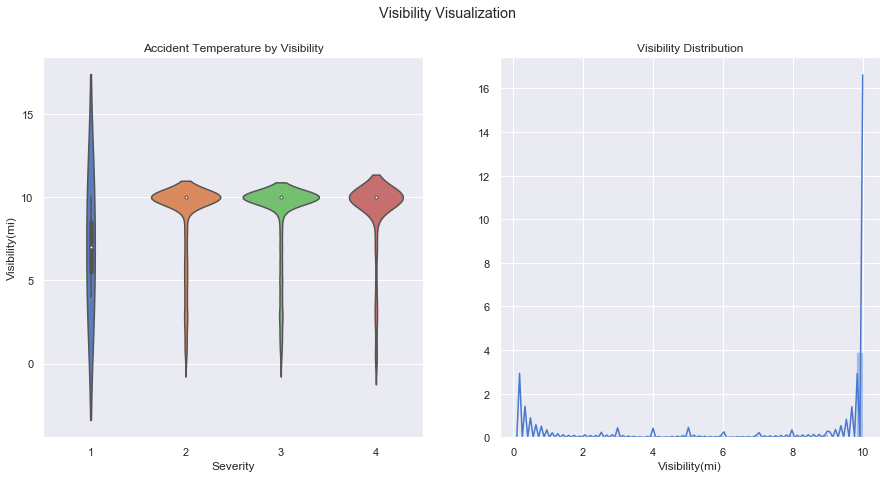

In [52]:
plt.figure(figsize = (15,7))
plt.subplot(1,2,1)
sns.violinplot(x = 'Severity', y = 'Visibility(mi)', data = df)
plt.title('Accident Temperature by Visibility')

plt.subplot(1,2,2)
sns.distplot(df['Visibility(mi)'])
plt.title('Visibility Distribution')

plt.suptitle('Visibility Visualization')

plt.show()

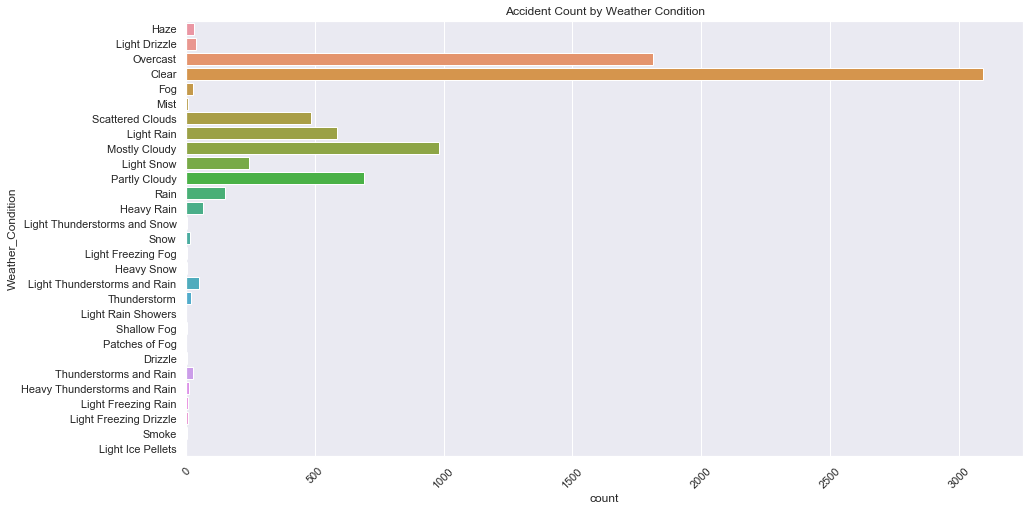

In [53]:
plt.figure(figsize = (15,8))
sns.countplot(y = 'Weather_Condition', data = df)
plt.xticks(rotation = 45)
plt.title('Accident Count by Weather Condition')
plt.show()

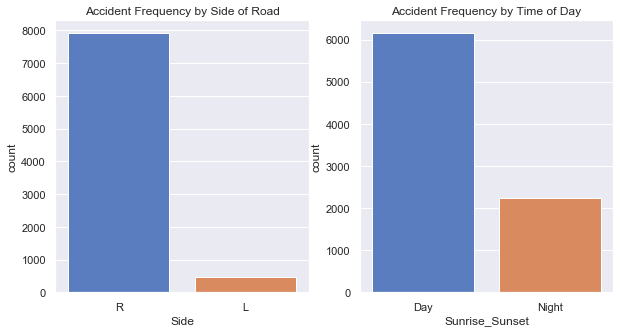

In [127]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
sns.countplot(x='Side', data = df)
plt.title('Accident Frequency by Side of Road')

plt.subplot(1,2,2)
sns.countplot(x='Sunrise_Sunset', data = df)
plt.title('Accident Frequency by Time of Day')

plt.show()

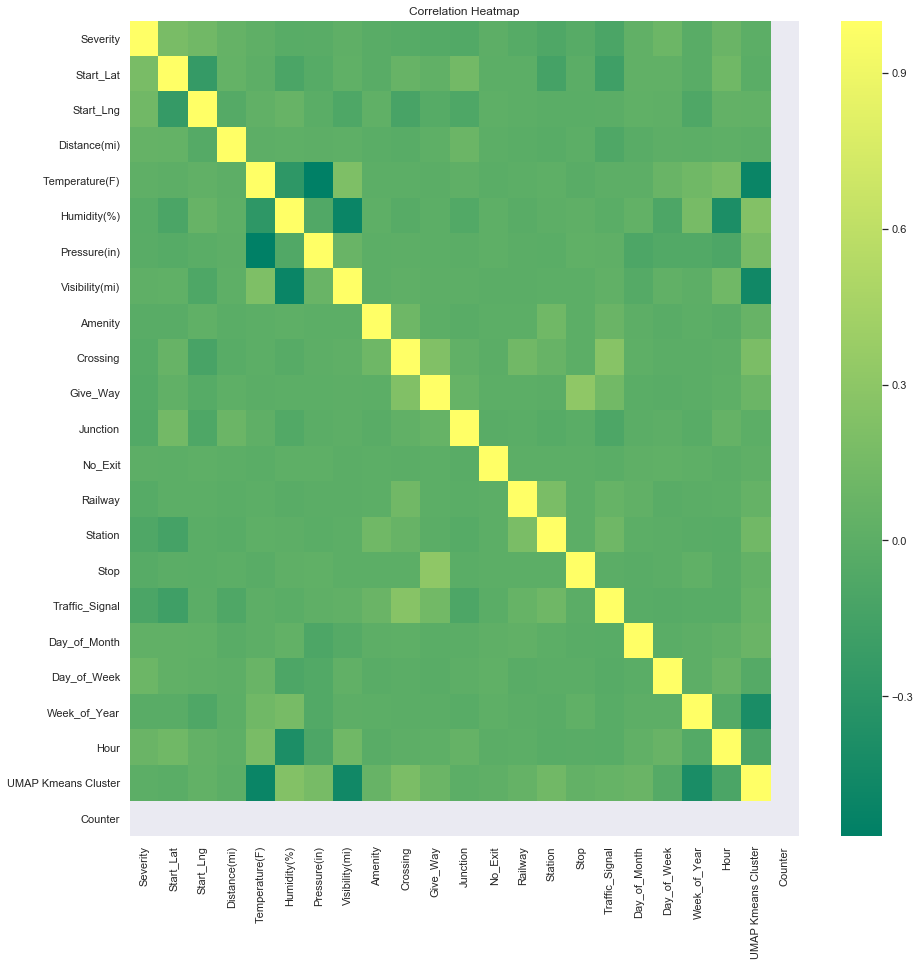

In [131]:
plt.figure(figsize = (15,15))
sns.heatmap(df.corr(), cmap = 'summer')
plt.title('Correlation Heatmap')
plt.show()

# Prep Data For Modeling

- Split categorical / continuous data
- Apply dimension reduction
- Scale data

In [57]:
#split dataframe
df_categorical = df.drop(columns = ['Start_Lat', 'Start_Lng', 'Severity', 'Distance(mi)','Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Day_of_Month', 'Day_of_Week', 'Week_of_Year', 'Hour'])
df_continuous = df.loc[:, ['Severity', 'Distance(mi)','Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Day_of_Month', 'Day_of_Week', 'Week_of_Year', 'Hour']]

In [58]:
#apply PCA to continuous data
pca = PCA(n_components = 8)
df_cont_pca = pca.fit_transform(df_continuous)

In [59]:
# apply MCA to categorical data
mca = prince.MCA(n_components=5, n_iter=3, copy=True, check_input=True, engine='auto', random_state=42)
mca_df = mca.fit_transform(df_categorical)

In [60]:
reduced_df = pd.concat([mca_df.reset_index(), pd.DataFrame(df_cont_pca).rename(mapper = {0: 'pca1', 1: 'pca2', 2: 'pca3', 3: 'pca4', 4: 'pca5', 5: 'pca6', 6: 'pca7', 7: 'pca8'}, axis =1)], axis =1)

reduced_df.rename(mapper = {0: 'mca1', 1: 'mca2', 2: 'mca3', 3: 'mca4', 4: 'mca5'}, axis =1, inplace = True)

#keep original index
reduced_df.set_index('index', inplace = True)

In [61]:
#scale data
scaler = StandardScaler()
X_std = scaler.fit_transform(reduced_df)

# Visualize with TSNE

Duration: 485.8676459999999


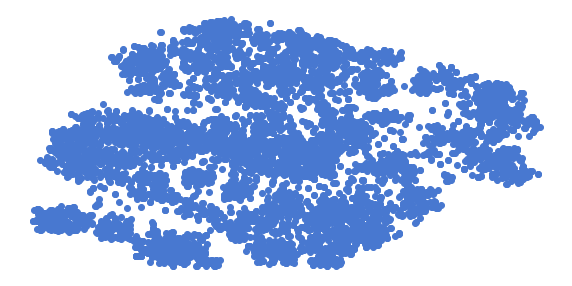

In [62]:
#start timer
t = time.process_time()

#create and fit model
tsne = TSNE(n_components=2, perplexity = 80)
tsne_results = tsne.fit_transform(X_std)

#end timer
elapsed_time = time.process_time() - t
print('Duration: {}'.format(elapsed_time))

#plot results
plt.figure(figsize=(10,5))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

# Apply Dimensionality Reduction and Clustering Models

A variety of dimensionality and clustering techniques were used. UMAP for dimension reduction provided the clearest clusters. K Means was able to find 4 clusters. Less successful techniques included:
- DBSCAN
- HDBSCAN
- K Medoids
- PCA


- DBSCAN and HDBSCAN applied all points as outliers
- K Medoids found only one cluster
- PCA with K Means didn't results in any clusters 

# Apply UMAP

In [95]:
X_umap = umap.UMAP(n_neighbors=5, min_dist=0.2, metric='correlation').fit_transform(X_std)

# Apply K Means to UMAP Data

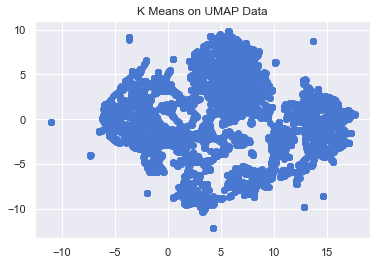

Silhouette Score: 0.4768502712249756
Duration: 8.74405999999999


In [96]:
#start timer
t = time.process_time()

k_means = KMeans(n_clusters=4, random_state=123, n_jobs = -1)
y_pred = k_means.fit_predict(X_umap)

# Plot the solution.
plt.scatter(X_umap[:,0], X_umap[:,1], )
plt.title('K Means on UMAP Data')
plt.show()

print('Silhouette Score: {}'.format(silhouette_score(X_umap, y_pred)))

#end timer
elapsed_time = time.process_time() - t
print('Duration: {}'.format(elapsed_time))

umap_k_means_labels = k_means.labels_
umap_k_means_cluster_centers = k_means.cluster_centers_

In [97]:
df['UMAP Kmeans Cluster'] = umap_k_means_labels
df['UMAP Kmeans Cluster Str'] = df['UMAP Kmeans Cluster'].astype(str)

In [98]:
cluster0_df = df.loc[df['UMAP Kmeans Cluster']==0]
cluster1_df = df.loc[df['UMAP Kmeans Cluster']==1]
cluster2_df = df.loc[df['UMAP Kmeans Cluster']==2]
cluster3_df = df.loc[df['UMAP Kmeans Cluster']==3]

In [132]:
df['Counter'] = 1
fig = px.pie(data_frame=df, values = 'Counter', names = 'UMAP Kmeans Cluster', title = 'Cluster Breakdown')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [100]:
cluster0_df.describe(include = 'O')

,Side,County,Wind_Direction,Weather_Condition,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,UMAP Kmeans Cluster Str
count,2542,2542,2542,2542,2542,2542,2542,2542,2542
unique,2,47,18,14,2,2,2,2,1
top,R,St. Louis County,South,Clear,Day,Day,Day,Day,0
freq,2391,781,434,989,2372,2471,2510,2520,2542


In [101]:
cluster0_df.describe()

,Severity,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Day_of_Month,Day_of_Week,Week_of_Year,Hour,UMAP Kmeans Cluster,Counter
count,2542.000000,2542.000000,2542.000000,2542.000000,2542.000000,2542.000000,2542.000000,2542.000000,2542.000000,2542.000000,2542.000000,2542.000000,2542.0,2542.0
mean,2.685681,38.655567,-92.225609,0.262593,78.233635,64.811172,29.949386,9.911172,14.546027,2.474430,27.866247,11.588120,0.0,1.0
std,0.571478,0.554289,1.941254,0.784534,9.622786,18.519158,0.137555,0.518824,8.648684,1.723947,7.558054,4.365609,0.0,0.0
min,1.000000,36.089985,-95.652489,0.000000,19.000000,21.000000,29.320000,0.200000,1.000000,0.000000,2.000000,0.000000,0.0,1.0
25%,2.000000,38.581558,-94.492273,0.000000,71.100000,50.000000,29.870000,10.000000,7.000000,1.000000,22.000000,8.000000,0.0,1.0
50%,3.000000,38.746786,-90.836021,0.000000,78.800000,65.000000,29.960000,10.000000,14.000000,2.000000,28.000000,11.000000,0.0,1.0
75%,3.000000,39.030578,-90.385579,0.323500,86.000000,81.000000,30.040000,10.000000,22.000000,4.000000,34.000000,16.000000,0.0,1.0
max,4.000000,40.584389,-89.536301,19.260000,102.000000,100.000000,30.610000,10.000000,31.000000,6.000000,52.000000,23.000000,0.0,1.0


In [102]:
cluster1_df.describe(include = 'O')

,Side,County,Wind_Direction,Weather_Condition,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,UMAP Kmeans Cluster Str
count,2087,2087,2087,2087,2087,2087,2087,2087,2087
unique,2,39,18,20,2,2,2,2,1
top,R,Jackson,Calm,Clear,Day,Day,Day,Day,1
freq,1976,723,246,865,1155,1341,1527,1669,2087


In [103]:
cluster1_df.describe()

,Severity,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Day_of_Month,Day_of_Week,Week_of_Year,Hour,UMAP Kmeans Cluster,Counter
count,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.0,2087.0
mean,2.697652,38.696718,-92.434088,0.182521,43.889938,73.042166,30.123263,8.980211,16.441303,2.454241,44.790609,12.150934,1.0,1.0
std,0.565981,0.520996,1.963199,0.350234,15.627823,17.441675,0.229725,2.340255,8.446509,1.788878,5.502788,5.550840,0.0,0.0
min,2.000000,36.569569,-95.532265,0.000000,10.800000,22.000000,29.180000,0.200000,1.000000,0.000000,15.000000,0.000000,1.0,1.0
25%,2.000000,38.613796,-94.500055,0.000000,30.900000,63.000000,29.940000,10.000000,10.000000,1.000000,43.000000,7.000000,1.0,1.0
50%,3.000000,38.775368,-93.190358,0.000000,43.000000,75.000000,30.140000,10.000000,16.000000,2.000000,46.000000,12.000000,1.0,1.0
75%,3.000000,39.039212,-90.403897,0.292500,52.000000,86.000000,30.280000,10.000000,24.000000,4.000000,48.000000,17.000000,1.0,1.0
max,4.000000,40.374317,-89.533241,3.573000,93.000000,100.000000,30.630000,10.000000,31.000000,6.000000,52.000000,23.000000,1.0,1.0


In [104]:
cluster2_df.describe(include = 'O')

,Side,County,Wind_Direction,Weather_Condition,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,UMAP Kmeans Cluster Str
count,2225,2225,2225,2225,2225,2225,2225,2225,2225
unique,2,42,18,14,2,2,2,2,1
top,R,St. Louis County,North,Clear,Day,Day,Day,Day,2
freq,2120,788,225,962,1632,1777,1915,1986,2225


In [105]:
cluster2_df.describe()

,Severity,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Day_of_Month,Day_of_Week,Week_of_Year,Hour,UMAP Kmeans Cluster,Counter
count,2225.000000,2225.000000,2225.000000,2225.000000,2225.000000,2225.000000,2225.000000,2225.000000,2225.000000,2225.000000,2225.000000,2225.000000,2225.0,2225.0
mean,2.737528,38.705211,-92.128211,0.360986,41.788404,59.459326,30.179276,9.876989,15.840899,2.537079,9.632360,12.399551,2.0,1.0
std,0.562112,0.476322,1.965775,1.059157,16.351554,19.969407,0.266485,0.572222,8.897843,1.746424,6.315209,4.966968,0.0,0.0
min,2.000000,36.016060,-95.360924,0.000000,-6.000000,17.000000,29.430000,0.800000,1.000000,0.000000,1.000000,0.000000,2.0,1.0
25%,2.000000,38.618300,-94.490852,0.000000,30.900000,44.000000,29.990000,10.000000,8.000000,1.000000,5.000000,8.000000,2.0,1.0
50%,3.000000,38.749611,-90.594452,0.000000,42.100000,60.000000,30.180000,10.000000,16.000000,2.000000,9.000000,13.000000,2.0,1.0
75%,3.000000,39.020260,-90.359932,0.383000,53.100000,75.000000,30.360000,10.000000,23.000000,4.000000,14.000000,17.000000,2.0,1.0
max,4.000000,40.470040,-89.538180,13.070000,91.000000,100.000000,30.980000,10.000000,31.000000,6.000000,50.000000,23.000000,2.0,1.0


In [106]:
cluster3_df.describe(include = 'O')

,Side,County,Wind_Direction,Weather_Condition,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,UMAP Kmeans Cluster Str
count,1521,1521,1521,1521,1521,1521,1521,1521,1521
unique,2,43,18,26,2,2,2,2,1
top,R,St. Louis County,Calm,Overcast,Day,Day,Day,Day,3
freq,1418,466,191,378,986,1083,1223,1342,1521


In [107]:
cluster3_df.describe()

,Severity,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Day_of_Month,Day_of_Week,Week_of_Year,Hour,UMAP Kmeans Cluster,Counter
count,1521.000000,1521.000000,1521.000000,1521.000000,1521.000000,1521.000000,1521.000000,1521.000000,1521.000000,1521.000000,1521.000000,1521.000000,1521.0,1521.0
mean,2.652202,38.611392,-92.085519,0.176506,51.987968,87.689020,29.997968,5.690467,16.911243,2.159106,20.560158,9.325444,3.0,1.0
std,0.560202,0.577347,1.910408,0.366385,16.251570,13.670895,0.216731,3.192350,8.773578,1.816861,14.562450,4.670167,0.0,0.0
min,1.000000,36.080509,-95.529060,0.000000,5.000000,19.000000,29.170000,0.100000,1.000000,0.000000,1.000000,0.000000,3.0,1.0
25%,2.000000,38.551987,-94.489456,0.000000,40.800000,85.000000,29.860000,3.000000,9.000000,0.000000,8.000000,6.000000,3.0,1.0
50%,3.000000,38.714451,-90.692900,0.000000,50.000000,93.000000,29.980000,5.000000,18.000000,2.000000,15.000000,8.000000,3.0,1.0
75%,3.000000,38.974052,-90.378090,0.235000,66.900000,96.000000,30.120000,10.000000,24.000000,4.000000,34.000000,13.000000,3.0,1.0
max,4.000000,40.367088,-89.212060,3.212000,91.400000,100.000000,30.740000,10.000000,31.000000,6.000000,52.000000,23.000000,3.0,1.0


# Attributes by Cluster

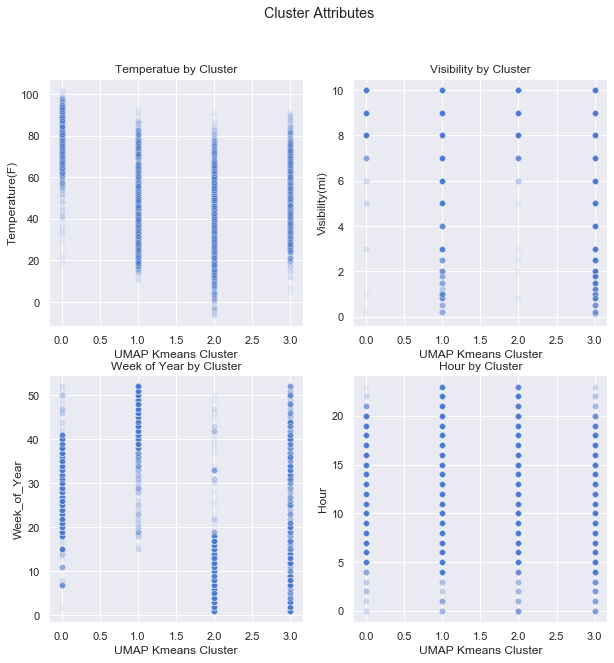

In [108]:
plt.figure(figsize = (10, 10))
plt.subplot(2, 2, 1)
sns.scatterplot(y = 'Temperature(F)', x = 'UMAP Kmeans Cluster', data = df, alpha = .08)
plt.title('Temperatue by Cluster')

plt.subplot(2, 2, 2)
sns.scatterplot(y = 'Visibility(mi)', x = 'UMAP Kmeans Cluster', data = df, alpha = .08)
plt.title('Visibility by Cluster')

plt.subplot(2, 2, 3)
sns.scatterplot(y = 'Week_of_Year', x = 'UMAP Kmeans Cluster', data = df, alpha = .08)
plt.title('Week of Year by Cluster')

plt.subplot(2, 2, 4)
sns.scatterplot(y = 'Hour', x = 'UMAP Kmeans Cluster', data = df, alpha = .08)
plt.title('Hour by Cluster')

plt.suptitle('Cluster Attributes')
plt.show()

In [109]:
cluster0_df['Counter'] = 1
fig = px.pie(data_frame=cluster0_df, values = 'Counter', names = 'Weather_Condition', title = 'Weather Condition Cluster 0')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [110]:
cluster1_df['Counter'] = 1
fig = px.pie(data_frame=cluster1_df, values = 'Counter', names = 'Weather_Condition', title = 'Weather Condition Cluster 1')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [111]:
cluster2_df['Counter'] = 1
fig = px.pie(data_frame=cluster2_df, values = 'Counter', names = 'Weather_Condition', title = 'Weather Condition Cluster 2')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [112]:
cluster3_df['Counter'] = 1
fig = px.pie(data_frame=cluster3_df, values = 'Counter', names = 'Weather_Condition', title = 'Weather Condition Cluster 3')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [113]:
fig = px.pie(data_frame=cluster0_df, values = 'Counter', names = 'Day_of_Week', title = 'Day of Week Cluster 0')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [114]:
fig = px.pie(data_frame=cluster1_df, values = 'Counter', names = 'Day_of_Week', title = 'Day of Week Cluster 1')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [115]:
fig = px.pie(data_frame=cluster2_df, values = 'Counter', names = 'Day_of_Week', title = 'Day of Week Cluster 2')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [116]:
fig = px.pie(data_frame=cluster3_df, values = 'Counter', names = 'Day_of_Week', title = 'Day of Week Cluster 3')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [138]:
px.set_mapbox_access_token("pk.eyJ1IjoiY2hyaXN0eWFsaW5lciIsImEiOiJjazQ2OTZpemEwaHY2M2VydGdzcnF6ZnN0In0.9QKi2cPrG5TrqTcY0oTINA")
fig = px.scatter_mapbox(data_frame = df,
                        lat = 'Start_Lat',
                        lon = 'Start_Lng',
                        color = 'UMAP Kmeans Cluster Str',
                        title = 'Missouri Accidents by Cluster',
                        color_discrete_sequence = px.colors.qualitative.Dark2,
                        center = {'lat': 38.5 , 'lon': -92 },
                        size = 'Counter',
                        size_max = 2.5,
                        zoom = 5.3, 
                        category_orders = {'UMAP Kmeans Cluster Str': ['0', '1', '2', '3']},
                        opacity = .1
                        )


fig.show()

In [118]:
px.set_mapbox_access_token("pk.eyJ1IjoiY2hyaXN0eWFsaW5lciIsImEiOiJjazQ2OTZpemEwaHY2M2VydGdzcnF6ZnN0In0.9QKi2cPrG5TrqTcY0oTINA")
fig = px.scatter_mapbox(data_frame = cluster0_df,
                        lat = 'Start_Lat',
                        lon = 'Start_Lng',
                        title = 'Missouri Accidents by Cluster 0',
                        color_discrete_sequence = px.colors.qualitative.Set3,
                        center = {'lat': 38.5 , 'lon': -92 },
                        size = 'Counter',
                        size_max = 2.5,
                        zoom = 5.3)


fig.show()

In [119]:
px.set_mapbox_access_token("pk.eyJ1IjoiY2hyaXN0eWFsaW5lciIsImEiOiJjazQ2OTZpemEwaHY2M2VydGdzcnF6ZnN0In0.9QKi2cPrG5TrqTcY0oTINA")
fig = px.scatter_mapbox(data_frame = cluster1_df,
                        lat = 'Start_Lat',
                        lon = 'Start_Lng',
                        title = 'Missouri Accidents by Cluster 1',
                        color_discrete_sequence = px.colors.qualitative.Set3,
                        center = {'lat': 38.5 , 'lon': -92 },
                        size = 'Counter',
                        size_max = 2.5,
                        zoom = 5.3)


fig.show()

In [120]:
px.set_mapbox_access_token("pk.eyJ1IjoiY2hyaXN0eWFsaW5lciIsImEiOiJjazQ2OTZpemEwaHY2M2VydGdzcnF6ZnN0In0.9QKi2cPrG5TrqTcY0oTINA")
fig = px.scatter_mapbox(data_frame = cluster2_df,
                        lat = 'Start_Lat',
                        lon = 'Start_Lng',
                        title = 'Missouri Accidents by Cluster 2',
                        color_discrete_sequence = px.colors.qualitative.Set3,
                        center = {'lat': 38.5 , 'lon': -92 },
                        size = 'Counter',
                        size_max = 2.5,
                        zoom = 5.3)


fig.show()

In [121]:
px.set_mapbox_access_token("pk.eyJ1IjoiY2hyaXN0eWFsaW5lciIsImEiOiJjazQ2OTZpemEwaHY2M2VydGdzcnF6ZnN0In0.9QKi2cPrG5TrqTcY0oTINA")
fig = px.scatter_mapbox(data_frame = cluster3_df,
                        lat = 'Start_Lat',
                        lon = 'Start_Lng',
                        title = 'Missouri Accidents by Cluster 3',
                        color_discrete_sequence = px.colors.qualitative.Set3,
                        center = {'lat': 38.5 , 'lon': -92 },
                        size = 'Counter',
                        size_max = 2.5,
                        zoom = 5.3)


fig.show()

# Conclusion

- Cluster 0: 
- Cluster 1: 
- Cluster 2: 
- Cluster 3: 

- K Means with UMAP dimensionality reduction performed best
- Silhouette score: 48%

# Further Analysis

- Age of driver
- Cell phone usage
- Distance driven during that driving period
- Road type (highway, freeway, etc.)
- Gender of driver
- Type of car